In [1]:
import sys
import serial #para leer la data del arduino uno
import pandas as pd #para volcar esta data en un dataframe y poder trabajarla
import time #para poder loggear el tiempo
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### para ver en que puerto tengo el sensor
import serial.tools.list_ports
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p) 


/dev/ttyACM0 - ttyACM0


In [16]:
#puerto_arduino = '/dev/cu.usbmodem11401' #este es el de mi otra compu 
puerto_arduino = '/dev/ttyACM0'
baud = 9600 #esta es la velocidad de comunicación entre la compu y el arduino
arduino = serial.Serial(port=puerto_arduino, baudrate=baud) 
print('Conectado exitosamente al puerto:' + puerto_arduino)
audio_data = np.array([])
frec_muestreo = 1000 #la misma que seteo al arduino
tiempo = 3
try:
    for i in range(tiempo * frec_muestreo):
        data = str(arduino.readline().decode('utf-8').strip())
        print('linea: ' + str(i) + ' : guardando valor ... : ' + data)
        audio_data = np.append(audio_data, int(data))
        time.sleep(1/frec_muestreo)
except KeyboardInterrupt:   
    print('fin toma datos!')
except ValueError:
    pass

arduino.close()
print('fin de toma de datos!')
 

Conectado exitosamente al puerto:/dev/ttyACM0
guardando valor ... : 
guardando valor ... : 3
fin de toma de datos!


In [17]:
len(audio_data)

1

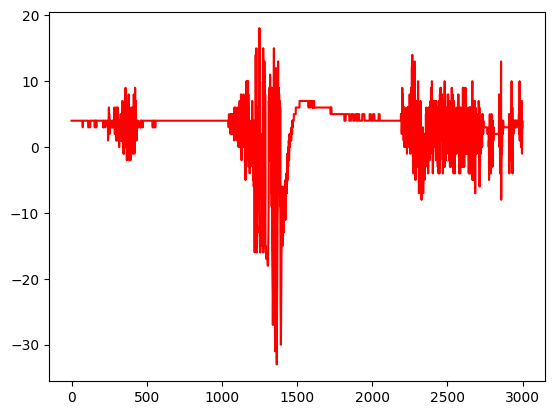

In [9]:
plt.plot(audio_data, color = 'red') #ahora tengo mi onda!!! 

<BarContainer object of 1501 artists>

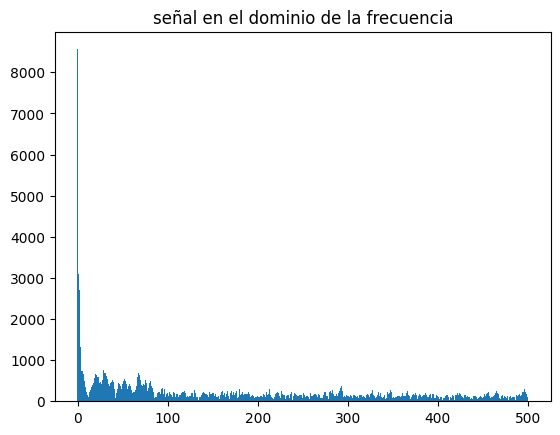

In [11]:

#transformada de Fourier!
s2 = np.fft.rfft(audio_data) # te devuelve intensidades de 'frecuencia', donde cada indice es la intensidad de cada frecuencia. Las freciencias van a ser la mitad de la frecuencia de muestreo por lo menos para el teorema del muestreo.
#funcion para el dominio de la frecuencia
rfrec=np.fft.rfftfreq(tiempo * frec_muestreo, d = 1/frec_muestreo)
plt.title('señal en el dominio de la frecuencia')
plt.bar(rfrec, abs(s2))